## Bike Sharing Demand Forecasting

# 📊 EDA: Bike Sharing Demand
Exploratory Data Analysis for the Kaggle Bike Sharing Demand dataset.

**Dataset Source**: [Kaggle Competition](https://www.kaggle.com/competitions/bike-sharing-demand)

## 1. Data Description

- datetime: Hourly timestamp
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday: Whether the day is a holiday (1) or not (0)
- workingday: Whether the day is neither a weekend nor holiday (1) or not (0)
- weather: 
    1: Clear, Few clouds
    2: Mist + Cloudy
    3: Light Snow, Rain
    4: Heavy Rain, Ice Pallets
- temp: Temperature in Celsius
- atemp: "Feels like" temperature in Celsius
- humidity: Relative humidity
- windspeed: Wind speed
- casual: Number of non-registered user rentals
- registered: Number of registered user rentals
- count: Total number of rentals (Target Variable)


## 2. Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


## 3. Loading the Dataset 

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")


## 4. Basic Data Exploration

In [3]:
#Checking the Top 5 Rows
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Check number of rows and columns
train_df.shape


(10886, 12)

In [5]:
# Display info about dataset columns, non-null counts, and data types
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Get basic statistics of the numerical features
train_df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- The dataset contains **10886 rows** and **12 columns**.
- All columns are complete — no missing values were found.
- `datetime` is in string format and should be converted.
- `count` (our target) is composed of `casual` and `registered`.
- Temperature, humidity, and windspeed are continuous features.
- Categorical features like `season`, `holiday`, and `weather` are encoded as integers.

We are now ready to move forward with cleaning, visualizations, and feature engineering.


## 5. Checking Duplicates and Null Values

In [7]:
# Find duplicate rows
duplicate_rows = train_df[train_df.duplicated()]
# Display number of duplicates
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [8]:
# Check for null values
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- **No duplicate rows** were found in the dataset.
- **No missing/null values** are present in any column.
- This confirms that the dataset is **clean and complete**, so we can move directly to Exploratory Data Analysis (EDA) and feature processing.


## 6. Exploratory Data Analysis (EDA)

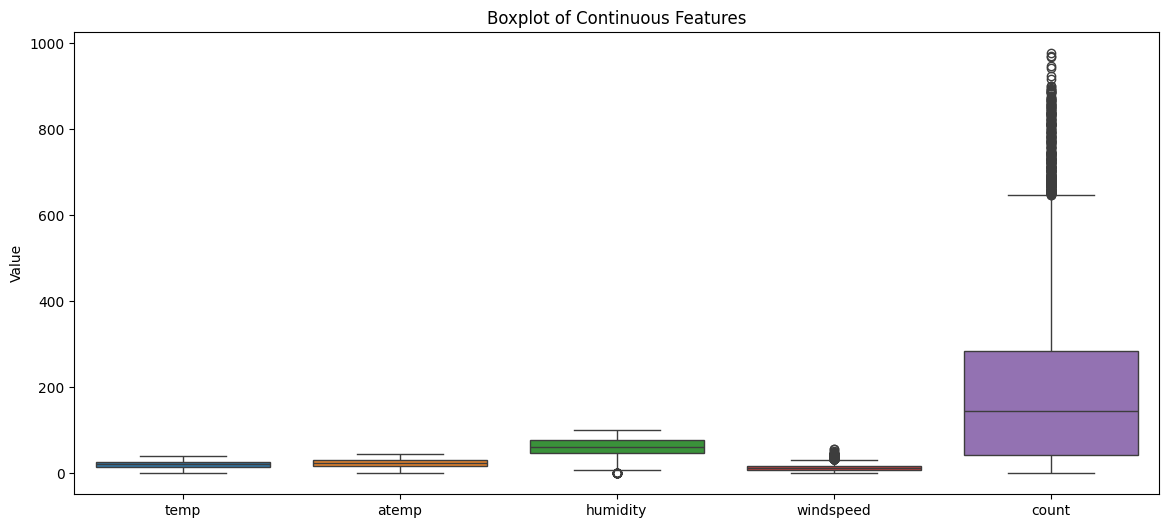

In [9]:
# Set style and plot size
plt.figure(figsize=(14, 6))

# Select continuous features for boxplot
sns.boxplot(data=train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.title("Boxplot of Continuous Features")
plt.ylabel("Value")
plt.show()

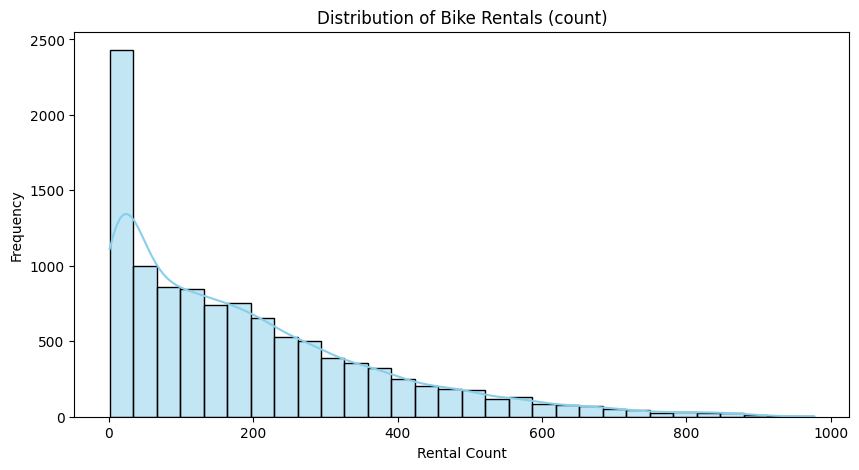

In [10]:
# Plot distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(train_df['count'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Bike Rentals (count)")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.show()


- `count` is **right-skewed**, indicating more low-rental hours and fewer high-demand peaks.
- `humidity` and `windspeed` show potential outliers that may be zero or unusually high.
- `temp` and `atemp` distributions appear fairly normal, suggesting they are well-scaled.
- No action taken yet — but detected outliers might be handled later if they hurt model performance.


## 7. Feature Engineering

####  Step 1: Convert `datetime` to DateTime Format

The `datetime` column is currently a string. We convert it to proper `datetime` format so we can extract additional time-based features.



In [11]:
# Convert string to datetime object
train_df['datetime'] = pd.to_datetime(train_df['datetime'])


In [12]:
# Extracting features
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year
train_df['weekday'] = train_df['datetime'].dt.weekday


In [13]:
# View first 5 rows with new features
train_df[['datetime', 'hour', 'day', 'month', 'year', 'weekday']].head()


,datetime,hour,day,month,year,weekday
0,2011-01-01 00:00:00,0,1,1,2011,5
1,2011-01-01 01:00:00,1,1,1,2011,5
2,2011-01-01 02:00:00,2,1,1,2011,5
3,2011-01-01 03:00:00,3,1,1,2011,5
4,2011-01-01 04:00:00,4,1,1,2011,5


## 8. Correlation Analysis and Visualizations

###  Correlation Heatmap

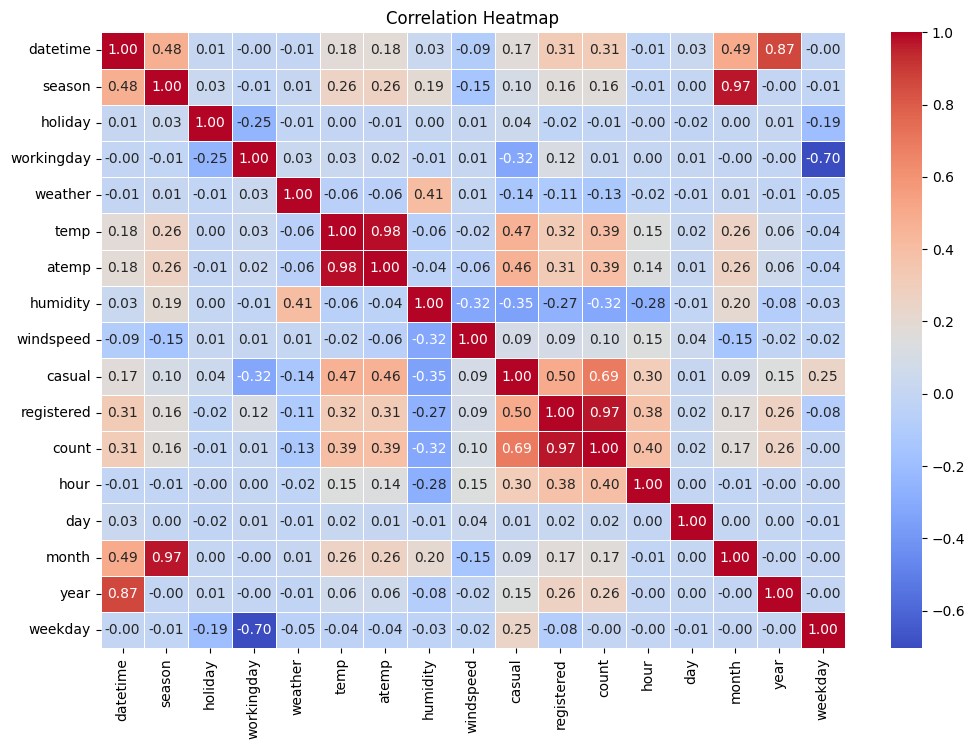

In [14]:
# Compute correlation matrix
correlation_matrix = train_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Rental Count vs Hour (Boxplot)
#### 🕔 Rental Count by Hour of Day

A boxplot helps visualize the rental pattern by hour. This can show:
- Rush hour demand
- Night-time lows


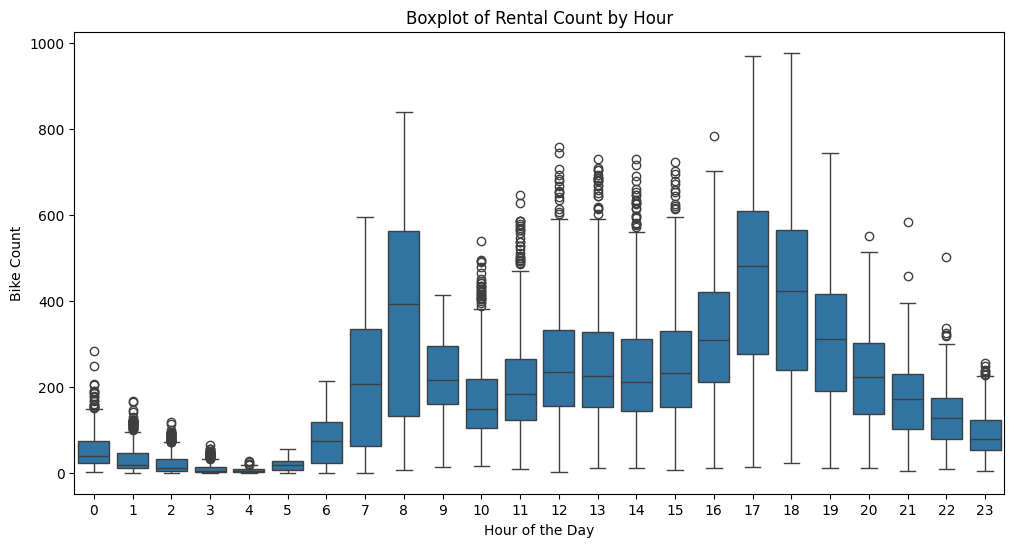

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='hour', y='count')
plt.title('Boxplot of Rental Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Count')
plt.show()


### Rental Count by Season

In [18]:
plt.figure(figsize=(12, 6))
season={1 :'spring', 2: 'summer', 3: 'fall', 4 : 'winter'}
sns.boxplot(data=train_df, x.value()='season', y='count')

plt.title('Boxplot of Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (316909531.py, line 3)

## Distribution of Bike Rental Counts

In [ ]:
# Histogram Plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(train_df['temp'], bins='auto', color='yellow', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 2, 2)
plt.hist(train_df['humidity'], bins='auto', color='blue', alpha=0.7)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 2, 3)
plt.hist(train_df['registered'], bins='auto', color='pink', alpha=0.7)
plt.title('Registered Users Distribution')
plt.xlabel('Registered Users')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(2, 2, 4)
plt.hist(train_df['casual'], bins='auto', color='green', alpha=0.7)
plt.title('Casual Users Distribution')
plt.xlabel('Casual Users')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


- `registered` has the highest correlation with `count`, followed by `hour`, `temp`, and `atemp`.
- Rental demand is **highest during rush hours** (8 AM, 5–6 PM).
- Summer and fall show higher usage compared to winter and spring.
- No single feature dominates; multiple time-based and weather-related features contribute.


## 9.Data Preparation

#### 🧹 Drop Unused Columns

We drop the following:
- `datetime`: Already decomposed into separate time features
- `casual`, `registered`: These leak the target `count`


In [ ]:
# Drop columns not needed for prediction
df_model = train_df.drop(['datetime', 'casual', 'registered'], axis=1)


In [ ]:
X = df_model.drop('count', axis=1)
y = df_model['count']


### Split the Dataset
#### - Train-Test Split

Split the data into training and validation sets using 80/20 ratio.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


- Dropped irrelevant or leakage-prone features (`datetime`, `casual`, `registered`).
- Separated target (`count`) from features.
- Split data into training and validation sets (80/20 split).
- Scaled features (optional, but ready for any algorithm).


## 10. Model Training and Evaluation

#### 🤖 Random Forest Regressor

Random Forest is chosen for:
- Handling non-linear relationships
- Robustness to outliers
- No need for feature scaling

We fit the model on the training set.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


In [ ]:
# Predict rental counts
y_pred = model.predict(X_val_scaled)

In [ ]:
y_pred

#### 📈 Evaluation Metrics

We use:
- RMSLE: Root Mean Squared Logarithmic Error (preferred for count data)
- R² Score: Goodness-of-fit metric

These help measure accuracy and model generalization.


In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score
import numpy as np

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

# Calculate R² Score
r2 = r2_score(y_val, y_pred)

print(f'RMSLE: {rmsle:.4f}')
print(f'R² Score: {r2:.4f}')


###  Final Model Performance Summary

After going through all stages — from cleaning and feature engineering to model training and evaluation — here are the key outcomes of the Bike Sharing Demand project:

####  Model Used:
- **RandomForestRegressor** (100 trees, default parameters)

#### Evaluation Metrics on Validation Set:
- **RMSLE:** 0.3315  
  - Indicates **low logarithmic error**, suitable for count-based targets
- **R² Score:** 0.9547  
  - The model explains **95.47% of the variance**, which reflects a **strong fit**



###  Key Insights from the Bike Sharing Dataset

1. **Rental Patterns Vary Greatly by Time of Day**
   - Rental count peaks during **morning (8 AM)** and **evening (5–6 PM)** hours.
   - These peaks correspond to **office commute hours**, especially for registered users.

2. **Registered Users Dominate the Demand**
   - The `registered` users contribute significantly more to `count` than `casual` users.
   - This suggests that most usage comes from people who regularly use the service (e.g., for commuting).

3. **Seasonality Impacts Usage**
   - **Summer and Fall (Season 3 and 4)** show higher demand than Spring and Winter.
   - Usage dips slightly in Winter, likely due to weather conditions.

4. **Weather and Temperature Affect Demand**
   - Demand drops when weather is poor (e.g., light rain or snow).
   - `temp` and `atemp` are positively correlated with count — people rent more when it feels warmer.

5. **Weekend vs Working Day**
   - `workingday = 1` generally correlates with higher rental activity, especially among registered users.
   - Casual user counts tend to rise on **non-working days (weekends/holidays)**.

6. **Humidity and Windspeed**
   - High humidity or zero windspeed appears as potential outliers.
   - Their correlation with rental count is relatively weak, but they may still contribute in edge cases.

7. **No Null or Duplicate Data**
   - The dataset was clean with no missing or duplicated values, simplifying preprocessing.

